In [81]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [92]:
digits = load_digits()

print(f"Number of samples: {len(digits.data)}")
print(f"Number of features: {len(digits.data[0])}")
print(f"Variance of the features: {np.var(digits.data)}")
print(f"Number of labels: {len(np.unique(digits.target))}")
print(f"labels: {np.unique(digits.target)}")

Number of samples: 1797
Number of features: 64
Range of values: 0.0-16.0
Variance of the features: 36.20173240585726
Number of labels: 10
labels: [0 1 2 3 4 5 6 7 8 9]


create an array for test size and accuracies so we can plot them. for r in range from 0.1 to 0.9 we train the model in a test-size ratio of r and then plot the result for each r.

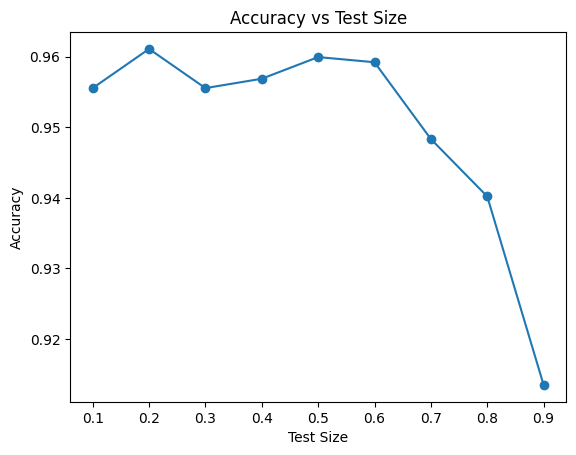

In [ ]:
test_sizes = []
accuracies = []

for test_size in range(1, 10):
    test_size_frac = test_size / 10.0
    
    X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=test_size_frac)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    accuracy = lr.score(X_test, y_test)
    
    test_sizes.append(test_size_frac)
    accuracies.append(accuracy)

plt.plot(test_sizes, accuracies, marker='o')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Test Size')
plt.show()

we create a sub dataset of size 1000 that is unblanced (172 samples of one label and 92 samples for each of the other 9 lables)

In [ ]:
from sklearn.utils import shuffle
import random

data, target = digits.data, digits.target
unbalanced_data = []
unbalanced_target = []
unblaenced_label = random.randint(0, 9)

for label in np.unique(target):
    num_of_samples = 172 if label == unblaenced_label else 92
    label_indices = np.where(target == label)[0]

    selected_label_indices = np.random.choice(label_indices, num_of_samples, replace=False)

    selected_data = data[selected_label_indices]
    selected_target = target[selected_label_indices]
    
    unbalanced_data.extend(selected_data)
    unbalanced_target.extend(selected_target)
  
unbalanced_data, unbalanced_target = shuffle(unbalanced_data, unbalanced_target, random_state=42)

unbalanced_data = np.array(unbalanced_data)
unbalanced_target = np.array(unbalanced_target)


based on the pusdo code given, this part takes lmin samples (calculated by itrating over the number of samples for each label and finding the min) from each label and add them to the dataset.

In [ ]:
lmin = float('inf')
for label in np.unique(unbalanced_target):
  tmp = np.where(unbalanced_target == label)[0]
  if len(tmp) < lmin:
    lmin = len(tmp)

balanced_data = []
balanced_target = []

for label in np.unique(target):
    label_indices = np.where(target == label)[0]

    selected_label_indices = np.random.choice(label_indices, lmin, replace=False)

    selected_data = data[selected_label_indices]
    selected_target = target[selected_label_indices]
    
    balanced_data.extend(selected_data)
    balanced_target.extend(selected_target)
balanced_data = np.array(balanced_data)
balanced_target = np.array(balanced_target)

same as before, we train the model on test-size ratio of range from 0.1 to 0.9 and show the results

In [ ]:
test_sizes_2 = []
accuracies_2 = []

# Iterate over the range of test sizes
for test_size in range(1, 10):
    # Compute the test size as a fraction of the dataset size
    test_size_frac = test_size / 10.0
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(balanced_data, balanced_target, test_size=test_size_frac)
    
    # Train a logistic regression model on the train set
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    # Evaluate the accuracy on the test set
    accuracy = lr.score(X_test, y_test)
    print(f"Test size: {test_size_frac}, Accuracy: {accuracy:.4f}")

Test size: 0.1, Accuracy: 0.9891
Test size: 0.2, Accuracy: 0.9565
Test size: 0.3, Accuracy: 0.9457
Test size: 0.4, Accuracy: 0.9565
Test size: 0.5, Accuracy: 0.9609
Test size: 0.6, Accuracy: 0.9475
Test size: 0.7, Accuracy: 0.9394
Test size: 0.8, Accuracy: 0.9253
Test size: 0.9, Accuracy: 0.8829


naive_k_feature_selection takes the train-set, test-set, and k as input, trains a classifier on all possible combinations of k features, and returns the best k features and the accuracy achieved on the test-set.

In [ ]:
from itertools import combinations

def naive_k_feature_selection(X_train, y_train, X_test, y_test, k):
    feature_combinations = list(combinations(range(X_train.shape[1]), k))

    best_accuracy = 0
    best_features = None

    for features in feature_combinations:
        X_train_selected = X_train[:, features]
        X_test_selected = X_test[:, features]

        lr = LogisticRegression(max_iter=10000)
        lr.fit(X_train_selected, y_train)

        accuracy = lr.score(X_test_selected, y_test)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_features = features

    return best_features, best_accuracy

In [93]:
X_train, X_test, y_train, y_test = train_test_split(data, target)
k = 2
best_features, best_accuracy = naive_k_feature_selection(X_train, y_train, X_test, y_test, k)

print(f"Best features: {best_features}")
print(f"Best accuracy: {best_accuracy:.4f}")

Best features: (21, 42)
Best accuracy: 0.4378
